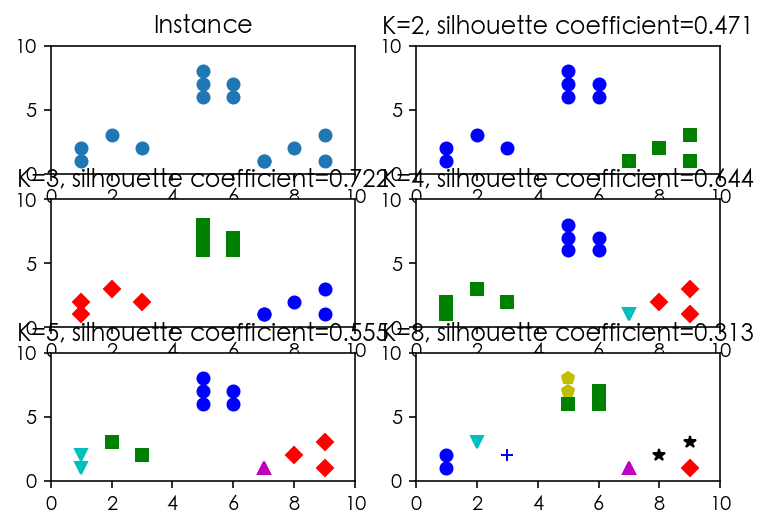

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 分割出6个子图，并在1号做图
plt.subplot(3, 2, 1)
# 初始化原始数字点
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
# X = np.array([x1,x2])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)


# 在1号子图做出原始数据点阵的分布
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instance')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']  # 点的颜色
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']  # 点的标号

clusters = [2, 3, 4, 5, 8]  # 簇的个数
subplot_counter = 1
# 轮廓系数列表
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)  # 训练模型
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s, silhouette coefficient=%0.03f' % (t, sc_score))
plt.show()

In [2]:
for k, silhouette_score in zip(clusters, sc_scores):
    print(k, '\t', silhouette_score)

2 	 0.47114752373147084
3 	 0.7215299149983971
4 	 0.644424904925249
5 	 0.5548170502705031
8 	 0.3125932424243398


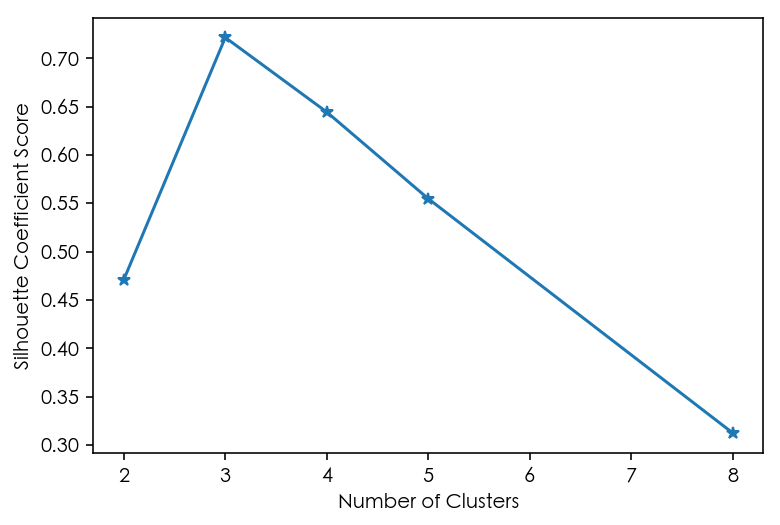

In [3]:
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()